<a href="https://colab.research.google.com/github/AGrantHewitt/Food_Sales_Predictions/blob/main/Food_Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploaratory

##Loading Data

In [2]:
#Loading Data CSV File
import pandas as pd
filename = "/content/drive/MyDrive/Coding Dojo/01 Week 1: Python/sales_predictions.csv"
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df0 = df.copy() #original data
df2 = df.copy() #copied data set for machine learning

##Data Inspection

In [4]:
#1) How many rows and columns?
df.shape

(8523, 12)

In [5]:
#2) What are the datatypes of each variable?
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
#3) Are there duplicates? If so, drop any duplicates.
df.duplicated().sum()

0

In [7]:
#4) Identify missing values.
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

##Data Cleaning

In [8]:
#5) Decide on how to address the missing values and do it!
df["Outlet_Size"].value_counts() #checking to see my unique values and how many there are to determine what is missing

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [9]:
df["Outlet_Size"].fillna("Missing",inplace = True) #replacing all NaN in the column with Missing as a place holder until I know if I'll need this column

In [10]:
#I want to replace the missing values in the weight column with a number. I will see which one makes the most sense
df["Item_Weight"].mean() #12.85
df["Item_Weight"].mode() #12.15
df["Item_Weight"].median() #12.6
#I am choosing the median because if I fill it, it won't cause any outliers in my data.
#I am only missing 17% of this column

12.6

In [11]:
df["Item_Weight"].fillna(df["Item_Weight"].median(),inplace = True)

In [12]:
df.info() #checking to see my data types and null values after filling 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [13]:
#6) Confirm that there are no missing values after addressing them.
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [14]:
#7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 
data_types = df.dtypes #creating a variable to make it easier the access this dataframe's data types
str_cols = data_types[ data_types=='object'].index #I only want to see the columns that are strings (aka objects) or non floats or integers. 
#I use .index to make it a list so I can iterate with a for loop
str_cols #only shows the columns with dtype == object

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [15]:
for cols in str_cols: #for each index(column) in my list (of only object columns)
  print(f'-{cols}:') #insert the column (at each index) in this format
  print(df[cols].value_counts(dropna=False)) #print all unique values of each column with their associated number
  print('\n\n') #create a new line for each iteration of the index so its easier to read
  #this was done o find descripencies in data input

-Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64



-Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64



-Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64



-Outlet_Identifier:
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
O

In [16]:
df["Item_Fat_Content"].value_counts() #this is the only column with descripencies

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [17]:
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("LF","Low Fat")
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("low fat","Low Fat")
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("reg","Regular")
df["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

##Data Visualization

In [18]:
#8) For any numerical columns, obtain the summary statistics of each (min, max, mean)
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

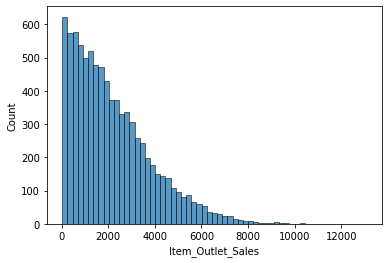

In [20]:
#Histogram to view the distributions of various features in your dataset.
sns.histplot(df['Item_Outlet_Sales']);

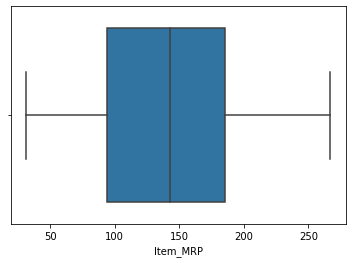

In [61]:
#Boxplot to view statistical summaries of various features in your dataset.
sns.boxplot(data = df, x= df['Item_MRP']);

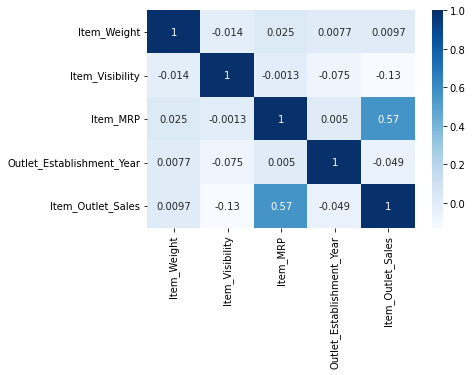

In [22]:
#Heatmap of the correlation between features.
corr = df.corr() #set my correlation data as a variable to make it easier to plot
sns.heatmap(corr, cmap = 'Blues', annot = True); 
#correlation coefficient greater than 0.7 is considered "strong."
#between 0.5 and 0.7 is considered "moderate".  
#between 0.3 and 0.5 is considered  a "low" correlation.
#There is a moderate positive correlation bewtween Item Weight and Item MRP

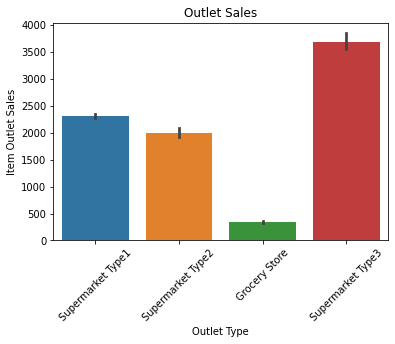

In [23]:
#Help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.
sns.barplot(data = df, x = "Outlet_Type", y = "Item_Outlet_Sales").set(title = "Outlet Sales")
plt.xticks(rotation = 45)
plt.xlabel('Outlet Type')
plt.ylabel("Item Outlet Sales");
#We see that the most sales come from supermarket type 3, we should focus on why this outlet has so many sales

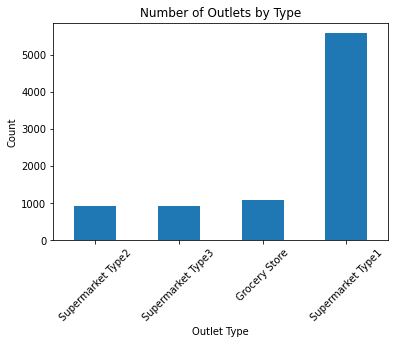

In [24]:
outlets = df['Outlet_Type'].value_counts().sort_values()
outlets.plot(kind='bar').set(title="Number of Outlets by Type")
plt.xticks(rotation = 45);
plt.xlabel('Outlet Type')
plt.ylabel("Count");

#We see that there are many type 1 supermarkets but they are not bringing in as many sales as the type 3

#Machine Learning

##Data Processing

In [25]:
#using the copy data set where i didn't clean the data for no data leakage into my test set
df2.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [47]:
#Identify the target (X) and features (y): 
#Assign the "Item_Outlet_Sales" column as the target and the rest of the relevant variables as the features matrix.  
y = df2['Item_Outlet_Sales']
X = df2.drop(columns = ['Item_Outlet_Sales', "Item_Identifier","Outlet_Identifier"]) #removed item identifier because model was overfit

In [48]:
#Perform a train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [49]:
#Cleaning the data on the training set only to give my make my model more accurate when I encode
#replaced the discrepinceis in the IFC column on the X (features) data only
X_train["Item_Fat_Content"].value_counts()
replace_dict = {'LF': "Low Fat", 'low fat': "Low Fat", "reg": "Regular"}

X_train['Item_Fat_Content'].replace(replace_dict, inplace=True)
X_test['Item_Fat_Content'].replace(replace_dict, inplace=True)

In [50]:
#Create a pre processing pipeline to prepare the dataset for Machine Learning
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder

#I decided that the outlet size column showed order rather than random nomiality. 
#Eventhough I would rather low,med, high or small, medium, large for more accuracy
size_col = [['Small', "Medium", "High"]] 
oe = OrdinalEncoder(categories=size_col)

freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
freq_imputer2 = SimpleImputer(strategy='most_frequent') #made a second freq imputer for the ordinal pipe in case of data leakage from the first freq imputer

cat_selector = ["Item_Fat_Content", "Item_Type", "Outlet_Location_Type","Outlet_Type"]
num_selector = make_column_selector(dtype_include='number')
ord_selector = ["Outlet_Size"]

ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
scaler = StandardScaler()
scaler2 = StandardScaler() #made a second scaler for the ordinal pipe in case of data leakage from the first scaler

cat_pipe = make_pipeline(freq_imputer, ohe)
num_pipe = make_pipeline(mean_imputer, scaler)
ord_pipe = make_pipeline(freq_imputer2, oe, scaler2)

num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)
ord_tuple = (ord_pipe, ord_selector)

preprocessor = make_column_transformer(num_tuple, cat_tuple, ord_tuple)

preprocessor.fit(X_train) #Only fit on training data

X_train_processed = preprocessor.transform(X_train) #transform on both train and test data
X_test_processed = preprocessor.transform(X_test)

##Linear Regression Model

In [51]:
# Build a linear regression model.
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg_pipe = make_pipeline(preprocessor, reg) #created a pipeline so the processed data could be fit as well
reg_pipe.fit(X_train, y_train)

from sklearn import set_config
set_config(display='diagram')
reg_pipe

train_preds = reg_pipe.predict(X_train) #predictions of what the model will be for X data
test_preds = reg_pipe.predict(X_test)

In [52]:
# Evaluate the performance of the model based on r^2.
from sklearn.metrics import r2_score, mean_squared_error
r2_train = r2_score(y_train, train_preds)
r2_test = r2_score(y_test, test_preds)

print(r2_train)
print(r2_test)

0.560577653797139
0.5659359284921062


In [53]:
# Evaluate the performance of the model based on rmse.
rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))

print(rmse_train)
print(rmse_test)

1140.3731710131124
1094.3367465013512


#Regression Tree Model

In [55]:
# Build a simple regression tree model.
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor(random_state = 42) #instantiating the decision tree
dec_pipe = make_pipeline(preprocessor, dec_tree) #created a pipeline so the processed data could be fit as well
dec_pipe.fit(X_train, y_train)#fitting the tree to the training data

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8d689e790>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehote...
                                                  ['Item_Fat_Content',
                                                   'Item_Type',
                                                   'Outlet_Location_Type',
                                                   'Outlet_Type']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'High']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Outlet_Size'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [62]:
# Compare the performance of this model based on r^2.
dec_train_preds = dec_pipe.predict(X_train) #predictions of what the model will be for X data
dec_test_preds = dec_pipe.predict(X_test)

train_score = r2_score(y_train, dec_train_preds)#r2 value for training
test_score = r2_score(y_test, dec_test_preds)#r2 value for training

print(train_score)
print(test_score)

1.0
0.18635743720595843


In [60]:
# Compare the performance of this model based on rmse.  
dec_rmse_train = np.sqrt(mean_squared_error(y_train, dec_train_preds))
dec_rmse_test = np.sqrt(mean_squared_error(y_test, dec_test_preds))

print(dec_rmse_train)
print(dec_rmse_test)

4.925864104892086e-15
1498.2727892949135


###Tuning

In [69]:
depths = range(1, dec_tree.get_depth()+1) #creating a range of depths from the previous dec_tree

scores = pd.DataFrame(columns=['Train','Test'], index=depths) #setting the depth as the index to easily see the train and test values
#loop over the values in depths 
for depth in depths: #a loop the iterates through each level of the dec_tree in order to find the best depth 
  tree = DecisionTreeRegressor(max_depth=depth) #remaking our dec_tree 
  tree_pipe = make_pipeline(preprocessor, tree) #new pipe for new tree
  tree_pipe.fit(X_train, y_train) #new fit

  t_train_pred = tree_pipe.predict(X_train) #new predictions
  t_test_pred = tree_pipe.predict(X_test)

  r2_train_t = r2_score(y_train, t_train_pred) #R2 values
  r2_test_t = r2_score(y_test, t_test_pred)

  scores.loc[depth, 'Train'] = r2_train_t #store the R2 values in the dataframe
  scores.loc[depth, 'Test'] = r2_test_t

In [70]:
best_depth = scores.sort_values(by='Test', ascending=False).index[0]
best_depth #best depth is 5!

5

In [73]:
best_tree = DecisionTreeRegressor(max_depth=best_depth) #a new model with the best depth to determin R2 and RMSE values
best_tree_pipe = make_pipeline(preprocessor, best_tree)
best_tree_pipe.fit(X_train, y_train)

best_train_preds = best_tree_pipe.predict(X_train)
best_test_preds = best_tree_pipe.predict(X_test)

best_train_score = r2_score(y_train, best_train_preds)#r2 value for training
best_test_score = r2_score(y_test, best_test_preds)#r2 value for training

print(best_train_score)
print(best_test_score)

0.6039397477322956
0.5947099753159972


In [74]:
best_rmse_train = np.sqrt(mean_squared_error(y_train, best_train_preds))
best_rmse_test = np.sqrt(mean_squared_error(y_test, best_test_preds))

print(best_rmse_train)
print(best_rmse_test)

1082.6461900869947
1057.4431299496734


#Recommended Model

In [58]:
# I have tried 3 different models on this data set. (linear regression, simple descion tree, best depth decsion tree)
# I recommend the model known as "best_tree" because the R2 value for the training and testing data are close to each other but also over 50%. 
#This model also perfroms better than the regression model which has its R2 values under 60% and better than the regular decision tree because that model was overfit.
#This model shows low bias and low variance giving the model a good balance which shows it is neither overfit or underfit to the data